In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
from fastai.vision.all import *
from fastai.distributed import *
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torchvision.transforms as transforms

In [3]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=256, shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=256, shuffle=False, num_workers=8)

dls = DataLoaders(trainloader, testloader)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
model = models.resnet34(pretrained=False)

In [5]:
model.fc.in_features

512

In [6]:
model.fc= nn.Linear(in_features=512, out_features=10)
model = model.cuda()

In [7]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, cbs=[CudaCallback, SaveModelCallback()], path=Path.cwd()/'resnet_tmp_cifar10')
learn.model = learn.model.cuda()

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.001737800776027143)

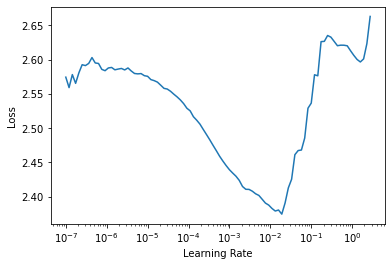

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(240, 3.9e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.181087,2.093472,0.252500,00:08
1,2.037826,1.973104,0.317300,00:08
2,1.948848,1.895935,0.352500,00:08
3,1.884545,1.847805,0.378000,00:08
4,1.835456,1.776704,0.410400,00:09
5,1.785575,1.743080,0.422000,00:09
6,1.752665,1.695287,0.449900,00:08
7,1.706123,1.650285,0.467400,00:09
8,1.669738,1.620234,0.480200,00:09
9,1.625052,1.585881,0.500600,00:09


Better model found at epoch 0 with valid_loss value: 2.0934717655181885.
Better model found at epoch 1 with valid_loss value: 1.9731037616729736.
Better model found at epoch 2 with valid_loss value: 1.8959345817565918.
Better model found at epoch 3 with valid_loss value: 1.8478049039840698.
Better model found at epoch 4 with valid_loss value: 1.776703953742981.
Better model found at epoch 5 with valid_loss value: 1.743079662322998.
Better model found at epoch 6 with valid_loss value: 1.6952868700027466.
Better model found at epoch 7 with valid_loss value: 1.650285005569458.
Better model found at epoch 8 with valid_loss value: 1.6202343702316284.
Better model found at epoch 9 with valid_loss value: 1.5858808755874634.
Better model found at epoch 10 with valid_loss value: 1.5408484935760498.
Better model found at epoch 11 with valid_loss value: 1.5346362590789795.
Better model found at epoch 12 with valid_loss value: 1.49360191822052.
Better model found at epoch 13 with valid_loss value:

In [10]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.8238000273704529.


(#2) [0.9305241107940674,0.8238000273704529]